In [1]:
from coffea import hist
import math

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import mplhep as hep
import numpy as np
import random
from itertools import chain

plt.style.use(hep.style.CMS)

import awkward as ak

from matplotlib import colors
POPTS={'norm':colors.LogNorm()}

In [2]:
from data import getData, repackage
ldmx_dict = getData(chunks=True, fnames="/Users/chloeg/Desktop/Work/Fermilab2021/HistData/kplus_gun_2GeV_Aug9_ntuple/*.root")




In [3]:
def extend_array(arr, new_attr, new_attr_name):
    members={n:arr[n] for n in arr.fields}
    members[new_attr_name] = new_attr
    return ak.zip(members)

def add_angle(arr,br=['px','py','pz','e'],name="theta"):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    arr = extend_array(arr, part.theta, name)
    return arr

def get_vector(arr):
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)

    part =  ak.zip({"x": arr.px,
                    "y": arr.py,
                    "z": arr.pz,
                    "t": arr.e,
                    },
                    with_name="LorentzVector")
    return part

def flat(x,axis=None): # for now must cast while waiting for coffea to catch up
    try:
        return ak.to_numpy(ak.flatten(x,axis=axis)) 
    except:
        return x
    
def pz_smear(pz):
    pz_array = []
    for part in pz:
        for element in part:
            if element <= 50:
                pz_perc = random.gauss(1,0.0404);
            elif element <= 100: 
                pz_perc = random.gauss(1,0.0410);
            elif element <= 250: 
                pz_perc = random.gauss(1,0.0415);
            elif element <= 500: 
                pz_perc = random.gauss(1,0.0420);
            elif element <= 1000: 
                pz_perc = random.gauss(1,0.0435);
            elif element <= 2000:  
                pz_perc = random.gauss(1,0.0477);
            elif element <= 3000:  
                pz_perc = random.gauss(1,0.0523);
            elif element <= 4000:  
                pz_perc = random.gauss(1,0.0573);            
            else:    
                pz_perc = random.gauss(1,0.06);
            pz_array=np.append(pz_array, [pz_perc])
    return (pz_array)

def px_smear(p):
    px_array = []
    for part in p:
        for element in part:
            if element <= 100:
                px_uncer = random.gauss(0,3.00);
            elif element <= 400: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 500: 
                px_uncer = random.gauss(0,3.20);
            elif element <= 1000: 
                px_uncer = random.gauss(0,3.40);
            elif element <= 1300: 
                px_uncer = random.gauss(0,3.50);
            elif element <= 2000:  
                px_uncer = random.gauss(0,3.85);           
            else:    
                px_uncer = random.gauss(0,3.85);
            px_array=np.append(px_array, [px_uncer])
    return (px_array)

def py_smear(p):
    py_array = []
    for part in p:
        for element in part:
            if element <= 100:
                py_uncer = random.gauss(0,3.75);
            elif element <= 350: 
                py_uncer = random.gauss(0,3.80);
            elif element <= 500: 
                py_uncer = random.gauss(0,4.20);
            elif element <= 1000: 
                py_uncer = random.gauss(0,4.80);
            elif element <= 1200: 
                py_uncer = random.gauss(0,4.98);
            elif element <= 2000:  
                py_uncer = random.gauss(0,3.85);           
            else:    
                py_uncer = random.gauss(0,5.50);
            py_array=np.append(py_array, [py_uncer])
    return (py_array)

In [4]:
hists = {}
hists["kaon_decay"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"Decay", 8, -4.5, -0.5), 
                            ) 

hists["kaon_vz"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ vz [mm]", 100, 0, 2000), 
                            )

hists["kaon_vz1"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ vz [mm]", 100, 0, 2000), 
                            )
hists["kaon_vz2"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ vz [mm]", 100, 0, 2000), 
                            )
hists["kaon_vz3"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ vz [mm]", 100, 0, 2000), 
                            )
hists["kaon_vz4"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ vz [mm]", 100, 0, 2000), 
                            )
hists["kaon_vz5"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ vz [mm]", 100, 0, 2000), 
                            )
hists["kaon_vz6"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ vz [mm]", 100, 0, 2000), 
                            )
hists["kaon_vz7"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ vz [mm]", 100, 0, 2000), 
                            )
hists["kaon_vz8"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ vz [mm]", 100, 0, 2000), 
                            )


hists["kaon_endz"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ endz [mm]", 100, 0, 2000), 
                            ) 
hists["kaon_endz1"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ endz [mm]", 100, 0, 2000), 
                            ) 
hists["kaon_endz2"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ endz [mm]", 100, 0, 2000), 
                            ) 
hists["kaon_endz3"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ endz [mm]", 100, 0, 2000), 
                            ) 
hists["kaon_endz4"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ endz [mm]", 100, 0, 2000), 
                            ) 
hists["kaon_endz5"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ endz [mm]", 100, 0, 2000), 
                            ) 
hists["kaon_endz6"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ endz [mm]", 100, 0, 2000), 
                            ) 
hists["kaon_endz7"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ endz [mm]", 100, 0, 2000), 
                            ) 
hists["kaon_endz8"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ endz [mm]", 100, 0, 2000), 
                            ) 


hists["kaon_kine"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ Kinetic Energy [MeV]", 100, 5, 2000), 
                            ) 
hists["kaon_e"] = hist.Hist("Sim Kaons",
                                hist.Bin("e", r"$K^+$ Kinetic Energy [MeV]", 40, 0, 2000), 
                            ) 
hists["kaon_hist"] = hist.Hist("Sim Kaons",
                                hist.Bin("m", r"$K^+$ Mass [MeV]", 40, 450, 550), 
                            )  
hists["daus_hist"] = hist.Hist("Sim Kaons",
                                hist.Bin("m", r"$K^+$ Mass [MeV]", 40, 450, 550), 
                            )   
hists["daus_smear_hist"] = hist.Hist("Sim Kaons",
                                hist.Bin("m", r"$K^+$ Mass [MeV]", 40, 450, 550), 
                            )     

In [5]:
def ProcessChunk(chunk, hists):
    ldmx_events = repackage(chunk)
    
    sim_particle = ldmx_events['Sim_Particle']
    sim_particle_n = ldmx_events['n']['Sim_Particle']
    sim_particle_dau1 = ldmx_events['Sim_Particle_dau1']
    sim_particle_dau2 = ldmx_events['Sim_Particle_dau2']
    sim_particle_dau3 = ldmx_events['Sim_Particle_dau3']
    
    hists["kaon_decay"].fill(      
                                 e=flat(sim_particle.decay),
                                )
    hists["kaon_vz"].fill(      
                                 e=flat(sim_particle.vz),
                                )
    hists["kaon_endz"].fill(      
                                 e=flat(sim_particle.endz),
                                )
    hists["kaon_kine"].fill(      
                                 e=flat(sim_particle.e)-flat(sim_particle.mass),
                                )
        
    klong_mask = sim_particle.pdgID == 130
    kshort_mask = sim_particle.pdgID == 310
    
    piplus_mass = 139.57
    pi0_mass    = 134.977

    decay_mask  = ((sim_particle_dau2.momdecay)<=0)
    decay1_mask  = ((sim_particle.decay)==1)
    decay2_mask  = ((sim_particle.decay)==2)
    decay3_mask  = ((sim_particle.decay)==3)
    decay4_mask  = ((sim_particle.decay)==4)
    decay5_mask  = ((sim_particle.decay)==5)
    decay6_mask  = ((sim_particle.decay)==6)
    decay7_mask  = ((sim_particle.decay)==7)
    decay8_mask  = ((sim_particle.decay)==8)
    
    hists["kaon_endz1"].fill(      
                                 e=flat(sim_particle[decay1_mask].endz),
                                )
    print(flat(sim_particle[decay1_mask].endz))
    hists["kaon_endz2"].fill(      
                                 e=flat(sim_particle[decay2_mask].endz),
                                )
    hists["kaon_endz3"].fill(      
                                 e=flat(sim_particle[decay3_mask].endz),
                                )
    hists["kaon_endz4"].fill(      
                                 e=flat(sim_particle[decay4_mask].endz),
                                )
    hists["kaon_endz5"].fill(      
                                 e=flat(sim_particle[decay5_mask].endz),
                                )
    hists["kaon_endz6"].fill(      
                                 e=flat(sim_particle[decay6_mask].endz),
                                )
    hists["kaon_endz7"].fill(      
                                 e=flat(sim_particle[decay7_mask].endz),
                                )
    hists["kaon_endz8"].fill(      
                                 e=flat(sim_particle[decay8_mask].endz),
                                )
   

    hists["kaon_vz1"].fill(      
                                 e=flat(sim_particle[decay1_mask].vz),
                                )
    hists["kaon_vz2"].fill(      
                                 e=flat(sim_particle[decay2_mask].vz),
                                )
    hists["kaon_vz3"].fill(      
                                 e=flat(sim_particle[decay3_mask].vz),
                                )
    hists["kaon_vz4"].fill(      
                                 e=flat(sim_particle[decay4_mask].vz),
                                )
    hists["kaon_vz5"].fill(      
                                 e=flat(sim_particle[decay5_mask].vz),
                                )
    hists["kaon_vz6"].fill(      
                                 e=flat(sim_particle[decay6_mask].vz),
                                )
    hists["kaon_vz7"].fill(      
                                 e=flat(sim_particle[decay7_mask].vz),
                                )
    hists["kaon_vz8"].fill(      
                                 e=flat(sim_particle[decay8_mask].vz),
                                )
    
    
    kplus_count = flat(flat(sim_particle.decay).shape)
    decay1_count = flat(flat(sim_particle[decay1_mask].decay).shape)
    decay2_count = flat(flat(sim_particle[decay2_mask].decay).shape)
    decay3_count = flat(flat(sim_particle[decay3_mask].decay).shape)
    decay4_count = flat(flat(sim_particle[decay4_mask].decay).shape)
    decay5_count = flat(flat(sim_particle[decay5_mask].decay).shape)
    decay6_count = flat(flat(sim_particle[decay6_mask].decay).shape)
    decay7_count = flat(flat(sim_particle[decay7_mask].decay).shape)
    decay8_count = flat(flat(sim_particle[decay8_mask].decay).shape)
    
    #decay 1: pi+, pi0
    #decay 2: muon+, numu
    #decay 3:
    #decay 4:
    #decay 5: pi+, pi0, pi0
    #decay 6: e+, pi0, nu-e 
    #decay 7: pi0, numu, mu+
    #decay 8: e-, n0, n0
    
    print(flat(sim_particle[decay_mask].decay))
    print(flat(sim_particle_dau1[decay_mask].pdgID))
    print(flat(sim_particle_dau2[decay_mask].pdgID))
    print(flat(sim_particle_dau3[decay_mask].pdgID))
 
    dau1 = get_vector(sim_particle_dau1[decay_mask])
    dau2 = get_vector(sim_particle_dau2[decay_mask])
#     dau3 = get_vector(sim_particle_dau3[decay_mask])
#     dausum = (dau1 + dau2 + dau3)
    dausum = (dau1 + dau2)
    
    new_px1 = px_smear(dau1.p)+flat(dau1.px)
    new_px2 = px_smear(dau2.p)+flat(dau2.px)
#     new_px3 = px_smear(dau3.p)+flat(dau3.px)
    new_py1 = py_smear(dau1.p)+flat(dau1.py)
    new_py2 = py_smear(dau2.p)+flat(dau2.py)
#     new_py3 = py_smear(dau3.p)+flat(dau3.py)
    new_pz1 = pz_smear(dau1.pz)*flat(dau1.pz)
    new_pz2 = pz_smear(dau2.pz)*flat(dau2.pz)
#     new_pz3 = pz_smear(dau3.pz)*flat(dau3.pz)
    
    new_psq1 = new_px1**2+new_py1**2+new_pz1**2
    new_psq2 = new_px2**2+new_py2**2+new_pz2**2
#     new_psq3 = new_px3**2+new_py3**2+new_pz3**2
    new_e1 = (np.sqrt(new_psq1+piplus_mass**2))
    new_e2 = (np.sqrt(new_psq2+pi0_mass**2))
#     new_e3 = (np.sqrt(new_psq3+piplus_mass**2))
    
    from coffea.nanoevents.methods import vector
    ak.behavior.update(vector.behavior)
    dau1_smear =  ak.zip({"x": new_px1,
                    "y": new_py1,
                    "z": new_pz1,
                    "t": new_e1,
                    },
                    with_name="LorentzVector")
    dau2_smear =  ak.zip({"x": new_px2,
                    "y": new_py2,
                    "z": new_pz2,
                    "t": new_e2,
                    },
                    with_name="LorentzVector")
#     dau3_smear =  ak.zip({"x": new_px3,
#                     "y": new_py3,
#                     "z": new_pz3,
#                     "t": new_e3,
#                     },
#                     with_name="LorentzVector")
#     dausum_smear =(dau1_smear + dau2_smear + dau3_smear)
    dausum_smear =(dau1_smear + dau2_smear)
    
    hists["kaon_e"].fill(      
                                 e=flat(sim_particle.e),
                                )
    hists["kaon_hist"].fill(      
                                 m=flat(sim_particle[decay_mask].mass),
                                )
    hists["daus_hist"].fill(      
                                 m=flat(dausum.mass),
                                )
    hists["daus_smear_hist"].fill(      
                                 m=flat(dausum_smear.mass),
                                )
    
    return kplus_count, decay1_count, decay2_count, decay3_count, decay4_count, decay5_count, decay6_count, decay7_count, decay8_count

In [6]:
nchunk = 0
total_kplus  = 0
total_decay1 = 0
total_decay2 = 0
total_decay3 = 0
total_decay4 = 0
total_decay5 = 0
total_decay6 = 0
total_decay7 = 0
total_decay8 = 0

for chunk in ldmx_dict:
    #if nchunk >= 1: break
    nchunk += 1
    print('process',nchunk)
    returna = ProcessChunk(chunk, hists)
    total_kplus  += returna[0]
    total_decay1 += returna[1]
    total_decay2 += returna[2]
    total_decay3 += returna[3]
    total_decay4 += returna[4]
    total_decay5 += returna[5]
    total_decay6 += returna[6]
    total_decay7 += returna[7]
    total_decay8 += returna[8]
print("Total Decay 1: ", total_decay1)
print("Total Decay 2: ", total_decay2)  
print("Total Decay 3: ", total_decay3)  
print("Total Decay 4: ", total_decay4)  
print("Total Decay 5: ", total_decay5)  
print("Total Decay 6: ", total_decay6)  
print("Total Decay 7: ", total_decay7)  
print("Total Decay 8: ", total_decay8) 
print("Total Kplus: ", total_kplus)  

process 1
[ 950.1503   354.55905  577.1991  ... 1090.8546   532.8377   568.4381 ]
[-2 -2 -2 -2 -2 -2 -2  0  0 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2  0 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2  0 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2  0 -2 -2 -2 -2  0 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2  0 -2 -2 -2 -2 -2 -2  0 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2  0  0 -2  0
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2
  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2
  0  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2  0 -2 -2 -2  0 -2 -2 -2 -2

process 2
[ 396.4615  2478.1074  2171.118   ...  388.50983 1038.4553   305.46085]
[-2  0 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2
 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2  0  0 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2  0 -2 -2 -2 -2  0  0 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2
  0 -2 -2  0 -2 -2  0 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  0 -2 -2  0 -2 -2 -2 -2  0 -2 -2 -2  0 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2  0 -2 -2 -2  0 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0
 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2
 -2 -2 -2  0 -2 -2 -2 -2 -2  0 -2 -2 -2  0

process 3
[640.3696    563.24066     7.4472613 ... 503.3132    497.82303
 430.59164  ]
[-2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2
  0 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2  0 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0  0 -2 -2 -2  0 -2 -2 -2
 -2  0 -2 -2 -2 -2 -2 -2  0 -2  0 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2  0 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2  0 -2 -2 -2 -2  0 -2 -2 -2
 -2  0 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2  0 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 

process 4
[  89.60865  500.08856 1961.8025  ...  457.85016  538.3527   916.88367]
[-2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0  0 -2 -2 -2 -2
 -2  0 -2  0 -2  0 -2 -2 -2 -2 -2  0 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2  0 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2  0 -2  0 -2 -2 -2 -2 -2  0
 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2  0 -2 -2  0 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2  0 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2  0 -2 -2 -2 -2  0 -2 -2  0

process 5
[1483.1012   243.04108  421.8073  ... 1669.5723   499.93237  523.00073]
[-2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2  0 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2  0 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  0 -2 -2 -2  0 -2 -2 -2 -2  0 -2 -2 -2  0 -2  0 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2  0 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2  0 -2 -2 -2  0 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2  0  0 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2
  0 -2 -2 -2 -2  0 -2 -2 -2 -2 -2  0 -2 -2

process 6
[552.92706 566.56445 458.91138 ... 574.95166 491.3498  515.52844]
[-2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2  0 -2 -2 -2
 -2  0  0 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0
 -2 -2 -2 -2 -2 -2 -2  0 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2
  0 -2 -2  0 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2  0  0 -2 -2  0
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2  0
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2

process 7
[-494.69247  255.66035  441.11746 ...  598.47815  959.0201  1058.5371 ]
[ 0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2  0 -2  0 -2 -2 -2 -2 -2 -2 -2
 -2 -2  0 -2  0 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0  0 -2 -2
 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2  0 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2  0 -2 -2 -2 -2
 -2 -2  0 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2  0 -2  0 -2 -2 -2 -2 -2  0 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2  0 -2 -2
 -2 -2  0 -2  0 -2 -2 -2  0 -2 -2 -2 -2 -2

process 8
[685.2198  466.08954 481.91754 ... 563.07007 530.425   460.15833]
[-2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2
 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0  0 -2 -2
 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2  0  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2
 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2  0 -2  0  0 -2 -2  0  0 -2 -2  0 -2 -2 -2 -2 -2 -2
 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2  0  0 -2 -2 -2  0 -2 -2  0 -2 -2 -2 -2 -2 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2 -2 -2  0 -2 -2 -2 -2
 -2 -2 -2 -2 -2 -2 -2 -2 -2  0  0 -2 -2  0 -2 -2

Total Decay 1:  [8681]
Total Decay 2:  [26666]
Total Decay 3:  [0]
Total Decay 4:  [0]
Total Decay 5:  [770]
Total Decay 6:  [2081]
Total Decay 7:  [1311]
Total Decay 8:  [36231]
Total Kplus:  [80000]


<Hist (m) instance at 0x12ee9d4f0>


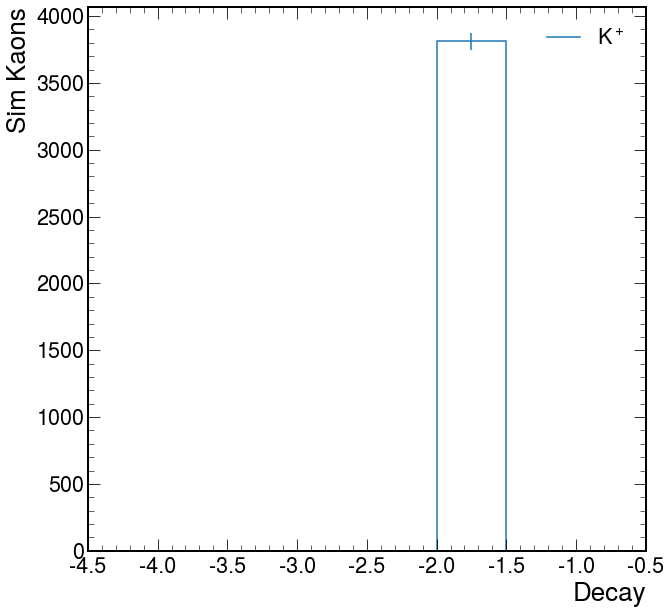

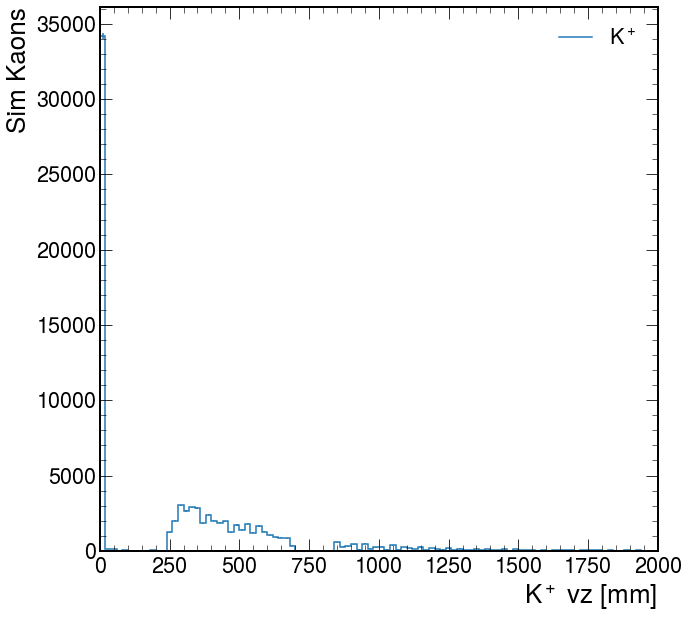

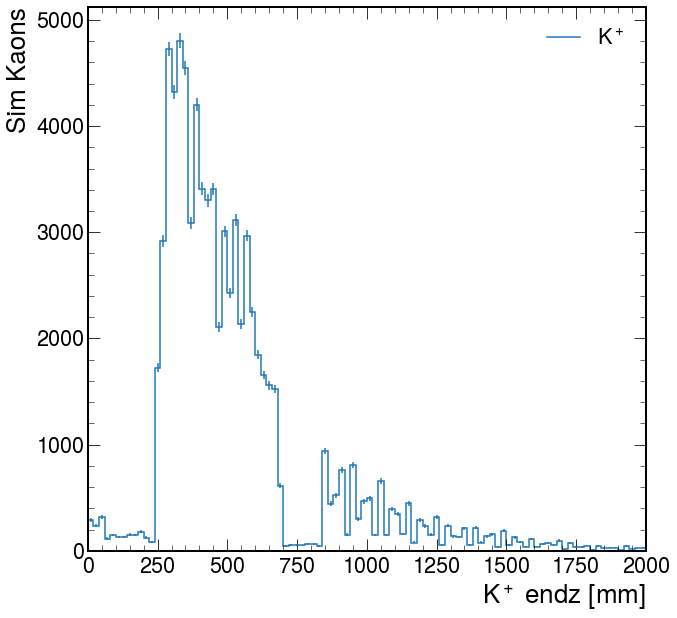

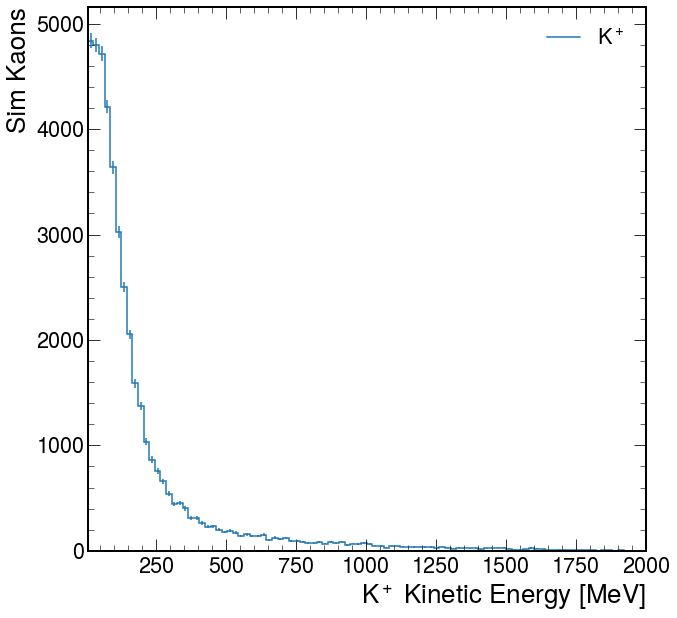

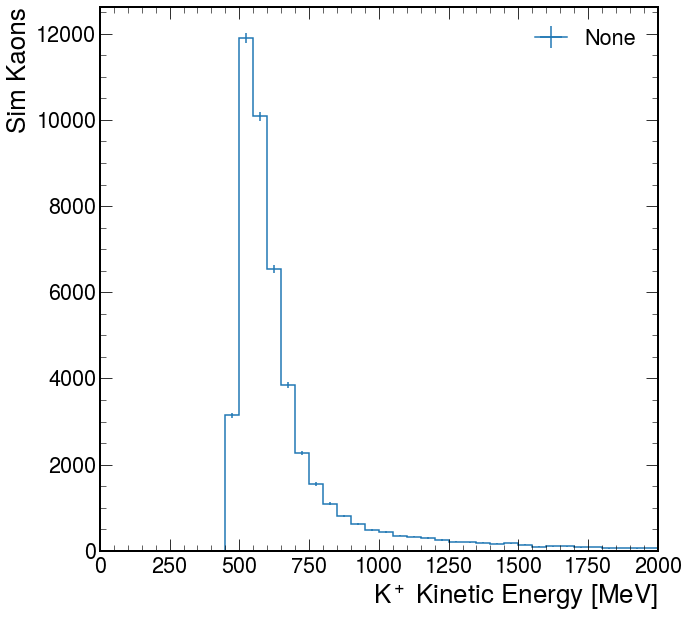

In [7]:
print(hists["kaon_hist"])
fig, ax = plt.subplots()
hist.plot1d(hists["kaon_decay"],ax=ax,clear=False);
leg = ax.legend([r'$K^+$'])

fig, ax = plt.subplots()
hist.plot1d(hists["kaon_vz"],ax=ax,clear=False);
leg = ax.legend([r'$K^+$'])

fig, ax = plt.subplots()
hist.plot1d(hists["kaon_endz"],ax=ax,clear=False);
leg = ax.legend([r'$K^+$'])

fig, ax = plt.subplots()
hist.plot1d(hists["kaon_kine"],ax=ax,clear=False);
leg = ax.legend([r'$K^+$'])

# fig, ax = plt.subplots()
# hist.plot1d(hists["kaon_hist"],ax=ax,clear=False);
# hist.plot1d(hists["daus_hist"],ax=ax,clear=False);
# hist.plot1d(hists["daus_smear_hist"],ax=ax,clear=False);
# leg = ax.legend([r'Truth $K^+$', r'Rec from Decay', r'Rec from Smeared Decay'])

fig, ax = plt.subplots()
hist.plot1d(hists["kaon_e"],ax=ax,clear=False);

<Hist (e) instance at 0x12ee737f0>
<Hist (e) instance at 0x12ee737f0>


/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


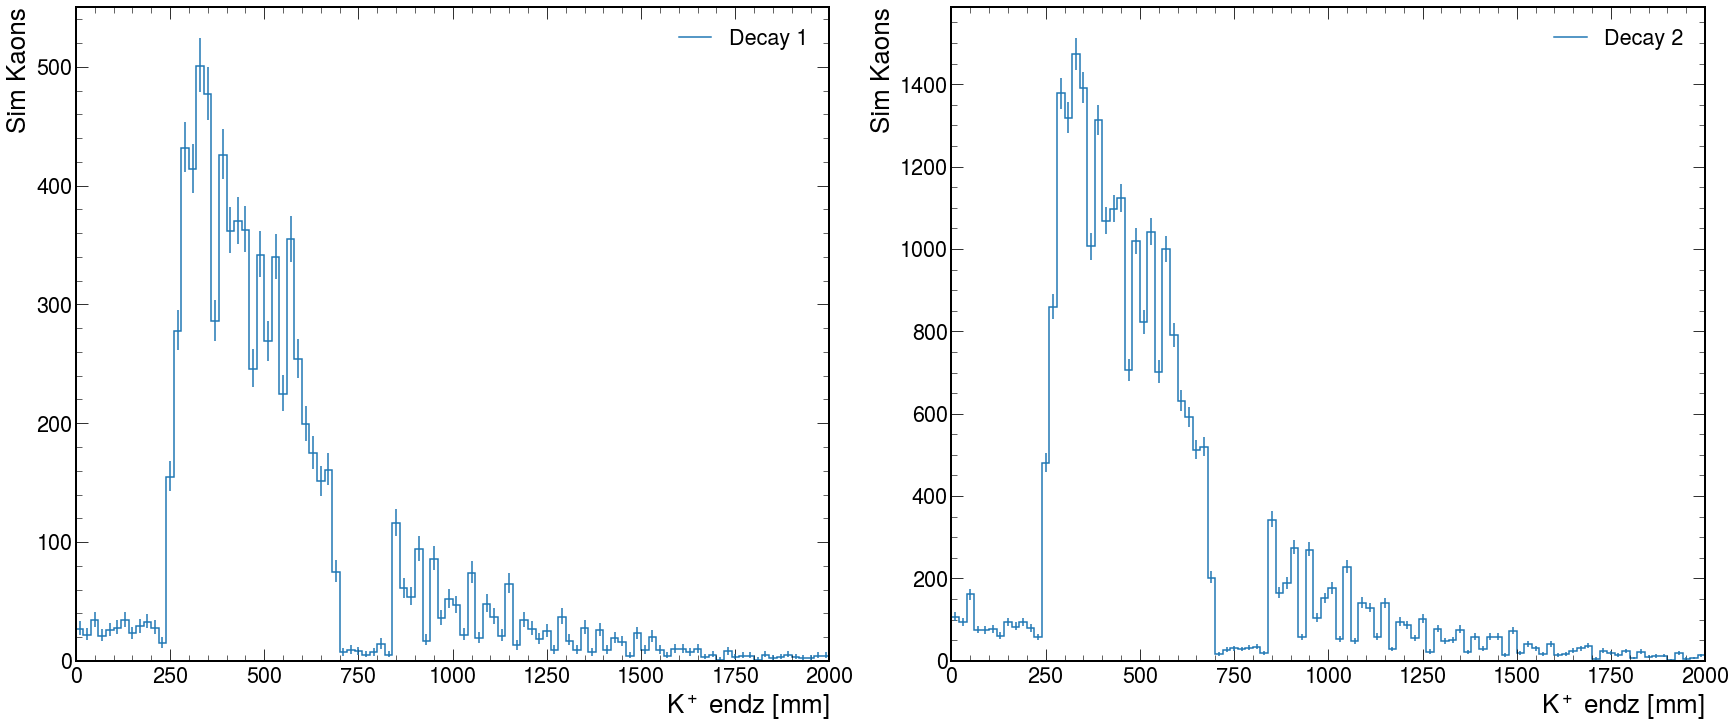

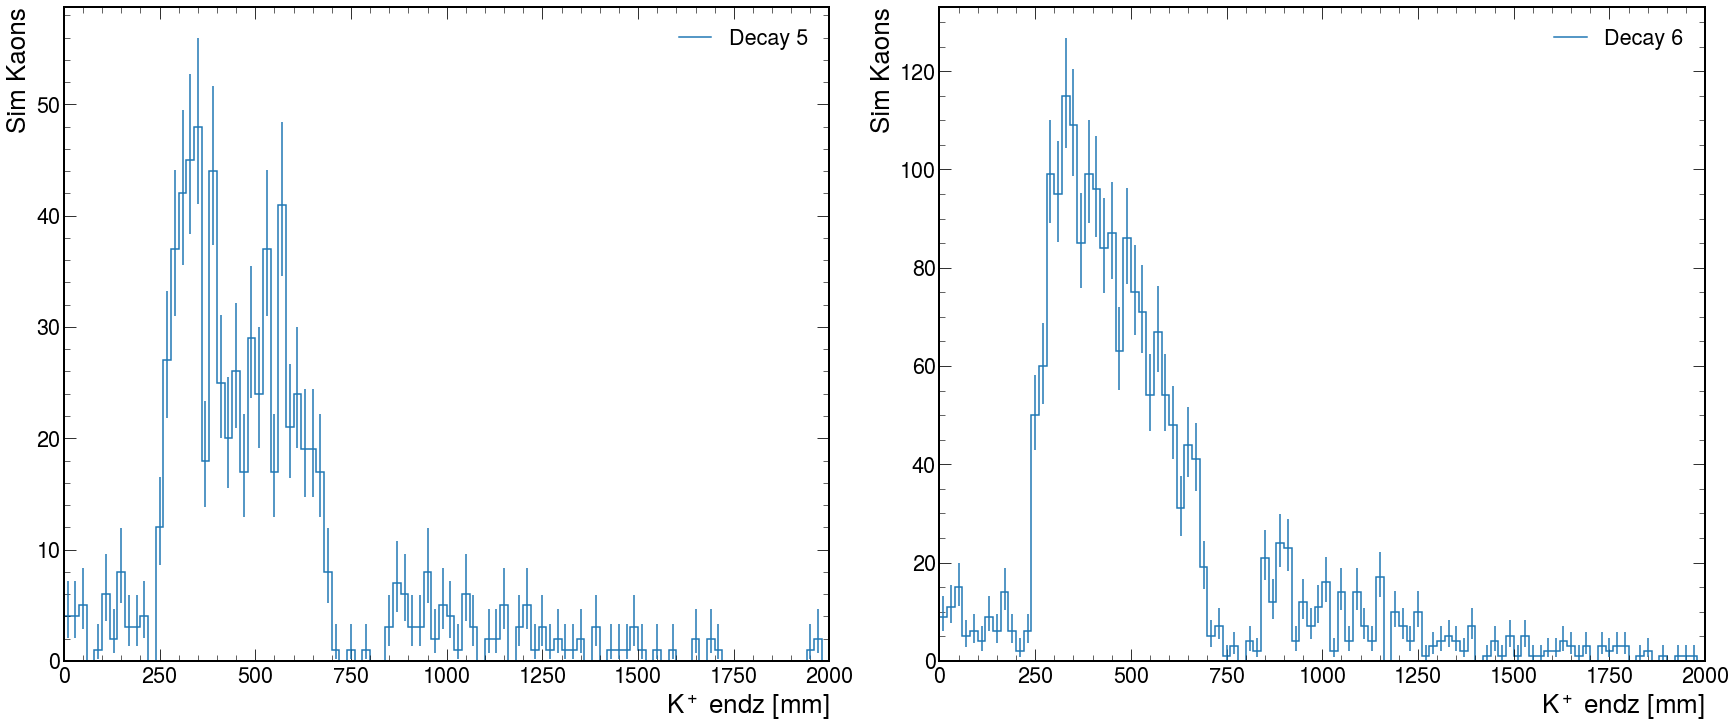

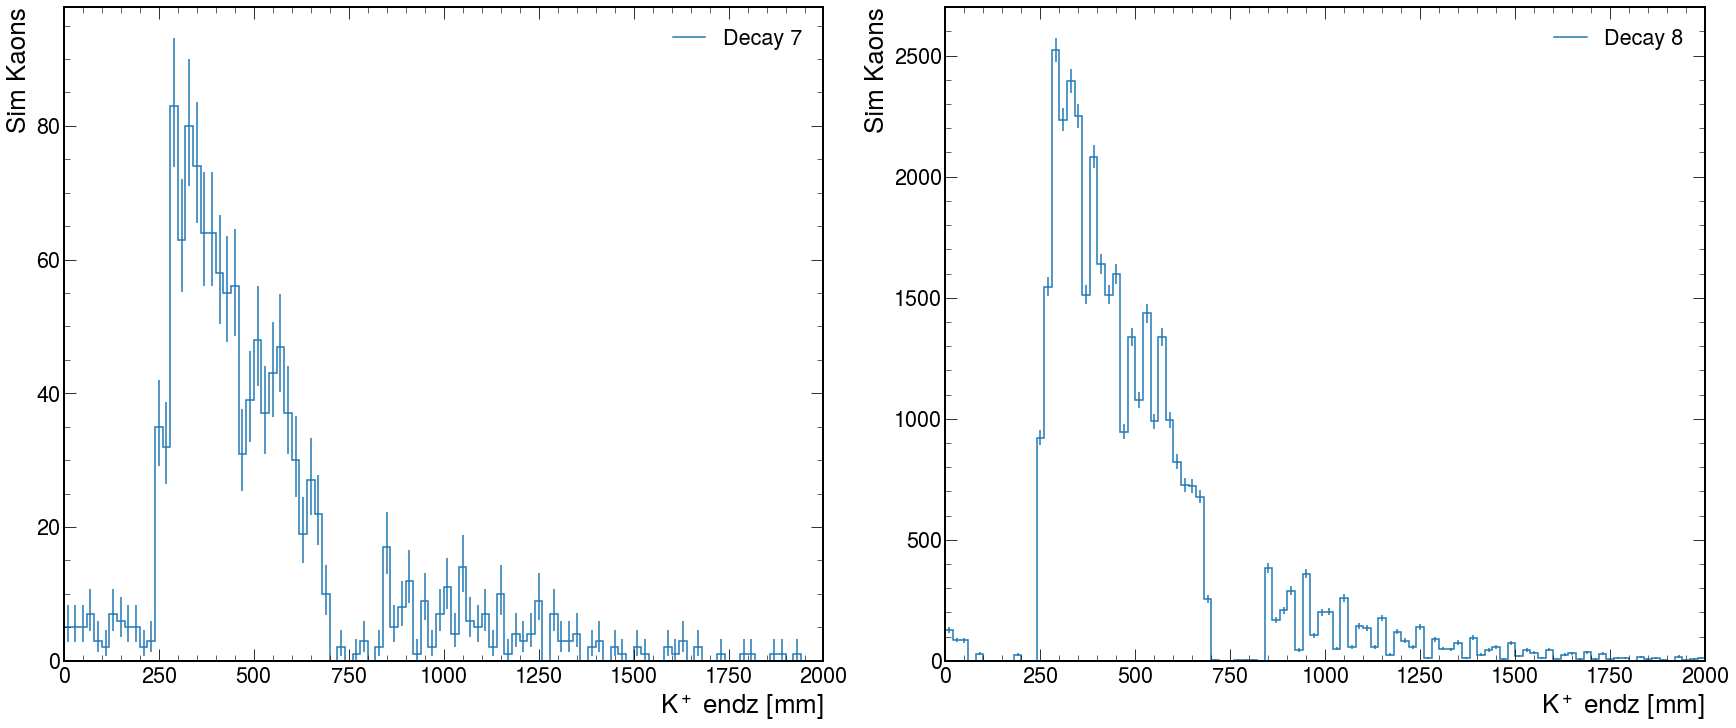

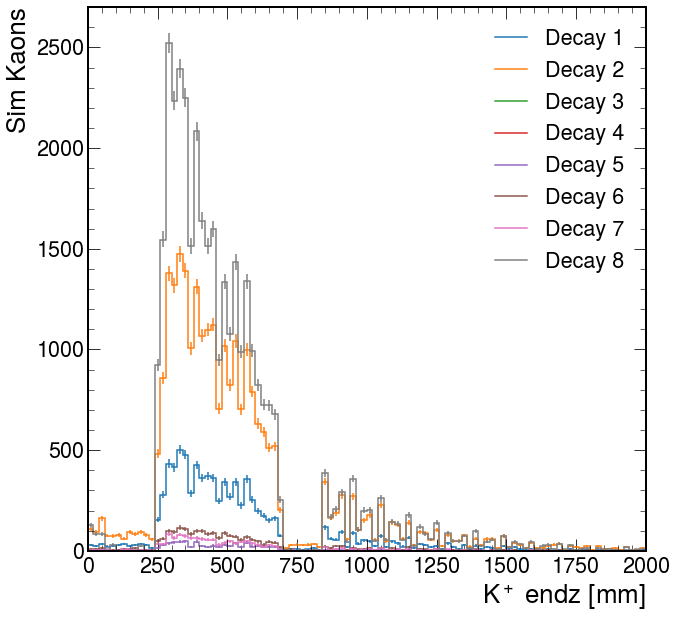

In [8]:
print(hists["kaon_endz1"])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot1d(hists["kaon_endz1"],ax=ax[0],clear=False);
hist.plot1d(hists["kaon_endz2"],ax=ax[1],clear=False);
leg = ax[0].legend([r'Decay 1'])
leg = ax[1].legend([r'Decay 2'])
# fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
# hist.plot1d(hists["kaon_endz3"],ax=ax[0],clear=False);
# hist.plot1d(hists["kaon_endz4"],ax=ax[1],clear=False);
# leg = ax[0].legend([r'Decay 3'])
# leg = ax[1].legend([r'Decay 4'])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot1d(hists["kaon_endz5"],ax=ax[0],clear=False);
hist.plot1d(hists["kaon_endz6"],ax=ax[1],clear=False);
leg = ax[0].legend([r'Decay 5'])
leg = ax[1].legend([r'Decay 6'])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot1d(hists["kaon_endz7"],ax=ax[0],clear=False);
hist.plot1d(hists["kaon_endz8"],ax=ax[1],clear=False);
leg = ax[0].legend([r'Decay 7'])
leg = ax[1].legend([r'Decay 8'])

print(hists["kaon_endz1"])
fig, ax = plt.subplots()
hist.plot1d(hists["kaon_endz1"],ax=ax,clear=False);
hist.plot1d(hists["kaon_endz2"],ax=ax,clear=False);
hist.plot1d(hists["kaon_endz3"],ax=ax,clear=False);
hist.plot1d(hists["kaon_endz4"],ax=ax,clear=False);
hist.plot1d(hists["kaon_endz5"],ax=ax,clear=False);
hist.plot1d(hists["kaon_endz6"],ax=ax,clear=False);
hist.plot1d(hists["kaon_endz7"],ax=ax,clear=False);
hist.plot1d(hists["kaon_endz8"],ax=ax,clear=False);
ax.set_ylim(0, 2700)
leg = ax.legend(['Decay 1', 'Decay 2', 'Decay 3', 'Decay 4', 'Decay 5', 'Decay 6', 'Decay 7', 'Decay 8'])

<Hist (e) instance at 0x12ee73850>
<Hist (e) instance at 0x12ee73850>


/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/hist/plot.py:43: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


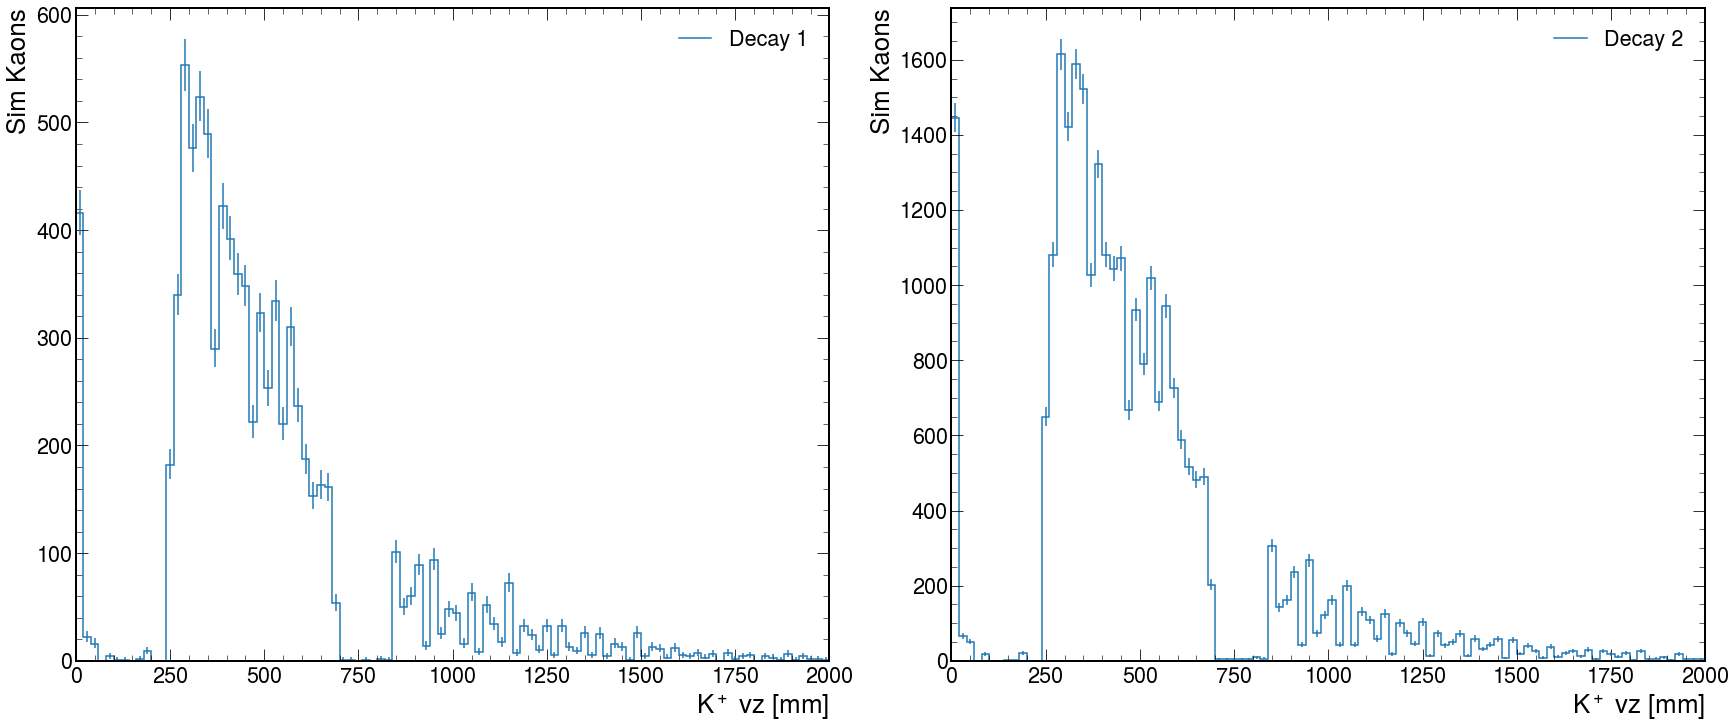

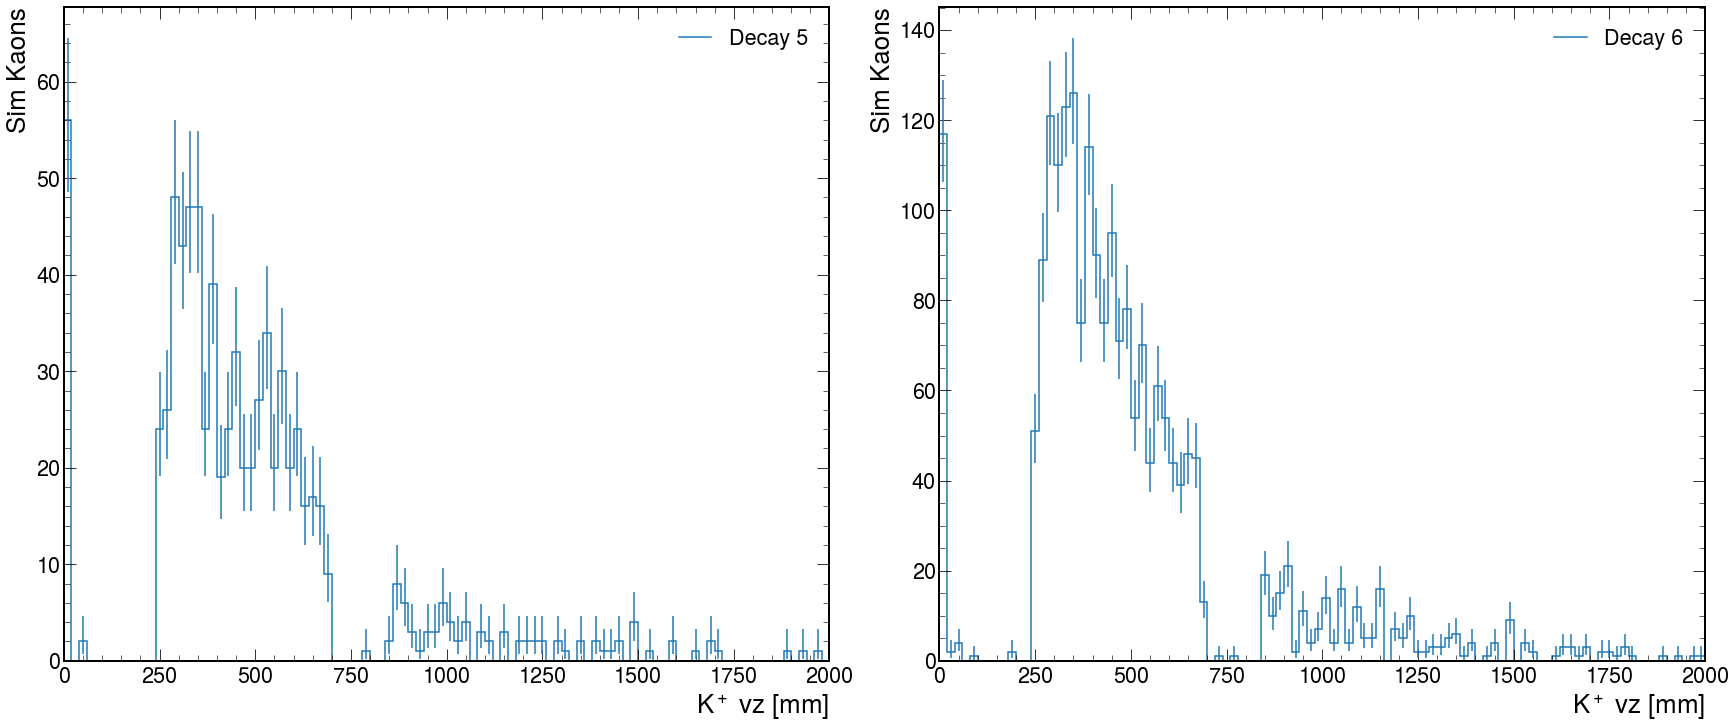

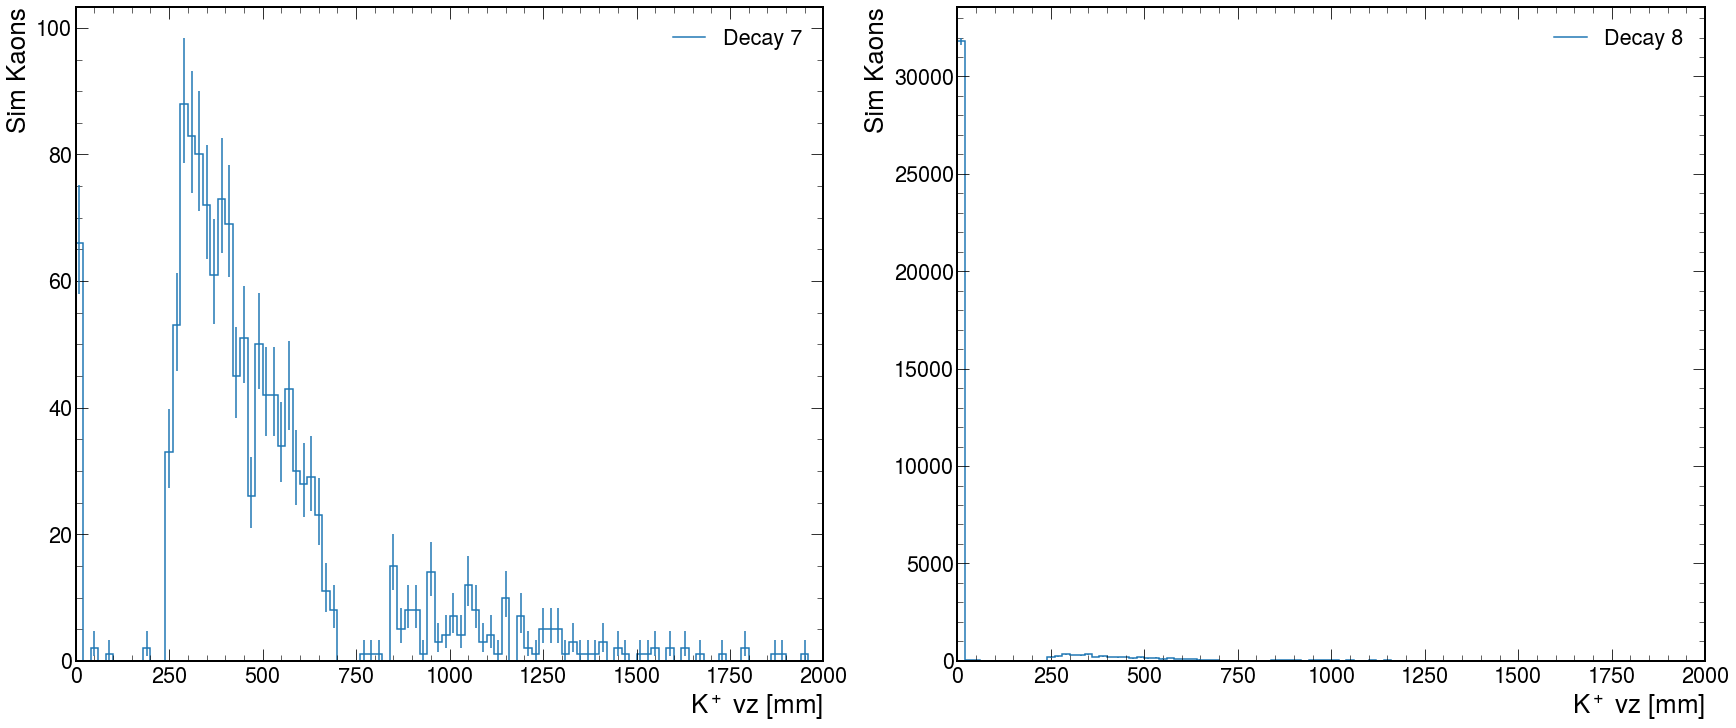

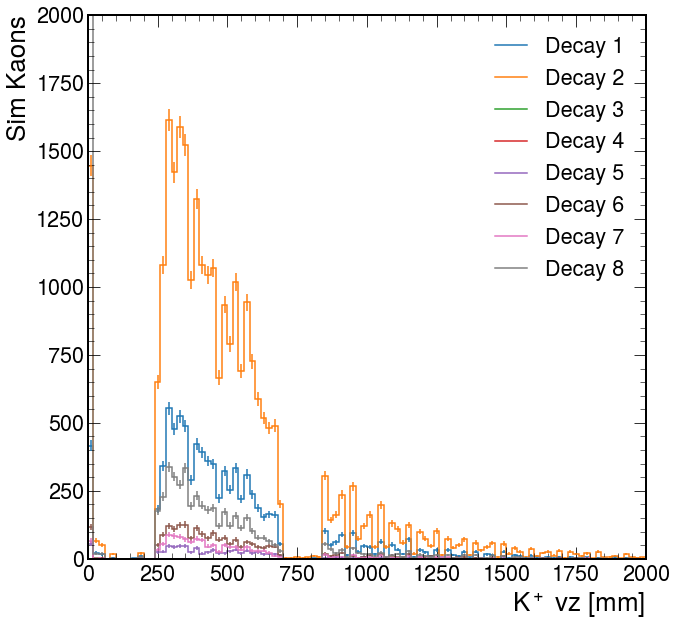

In [9]:
print(hists["kaon_vz1"])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot1d(hists["kaon_vz1"],ax=ax[0],clear=False);
hist.plot1d(hists["kaon_vz2"],ax=ax[1],clear=False);
leg = ax[0].legend([r'Decay 1'])
leg = ax[1].legend([r'Decay 2'])
# fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
# hist.plot1d(hists["kaon_vz3"],ax=ax[0],clear=False);
# hist.plot1d(hists["kaon_vz4"],ax=ax[1],clear=False);
# leg = ax[0].legend([r'Decay 3'])
# leg = ax[1].legend([r'Decay 4'])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot1d(hists["kaon_vz5"],ax=ax[0],clear=False);
hist.plot1d(hists["kaon_vz6"],ax=ax[1],clear=False);
leg = ax[0].legend([r'Decay 5'])
leg = ax[1].legend([r'Decay 6'])
fig, ax = plt.subplots(1,2,figsize=(24,10), constrained_layout=True)
hist.plot1d(hists["kaon_vz7"],ax=ax[0],clear=False);
hist.plot1d(hists["kaon_vz8"],ax=ax[1],clear=False);
leg = ax[0].legend([r'Decay 7'])
leg = ax[1].legend([r'Decay 8'])

print(hists["kaon_vz1"])
fig, ax = plt.subplots()
hist.plot1d(hists["kaon_vz1"],ax=ax,clear=False);
hist.plot1d(hists["kaon_vz2"],ax=ax,clear=False);
hist.plot1d(hists["kaon_vz3"],ax=ax,clear=False);
hist.plot1d(hists["kaon_vz4"],ax=ax,clear=False);
hist.plot1d(hists["kaon_vz5"],ax=ax,clear=False);
hist.plot1d(hists["kaon_vz6"],ax=ax,clear=False);
hist.plot1d(hists["kaon_vz7"],ax=ax,clear=False);
hist.plot1d(hists["kaon_vz8"],ax=ax,clear=False);
ax.set_ylim(0, 2000)
leg = ax.legend(['Decay 1', 'Decay 2', 'Decay 3', 'Decay 4', 'Decay 5', 'Decay 6', 'Decay 7', 'Decay 8'])